<a href="https://colab.research.google.com/github/hongducp850-maker/TTNT/blob/main/baitaptuan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================
# Ma trận kề của đồ thị 6 đỉnh
# ============================
G = [
    [0, 1, 1, 0, 1, 0],
    [1, 0, 1, 1, 0, 1],
    [1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 1],
    [0, 1, 0, 1, 1, 0]
]

# Tên các đỉnh
node = "ABCDEF"

# Map tên đỉnh -> chỉ số
t_ = {node[i]: i for i in range(len(G))}

# ============================
# Bậc của từng đỉnh
# ============================
degree = [sum(G[i]) for i in range(len(G))]

# ============================
# Tập màu có thể sử dụng
# ============================
colorDict = {node[i]: ["Blue", "Red", "Yellow", "Green"] for i in range(len(G))}

# ============================
# Sắp xếp đỉnh theo thứ tự bậc giảm dần
# ============================
degree_pairs = list(zip(node, degree))  # (A,3), (B,4)...
sortedNode = [x[0] for x in sorted(degree_pairs, key=lambda x: x[1], reverse=True)]

# ============================
# Tô màu đồ thị (Greedy)
# ============================
theSolution = {}

for n in sortedNode:
    availableColors = colorDict[n]
    chosenColor = availableColors[0]
    theSolution[n] = chosenColor

    # Loại màu đã dùng khỏi hàng xóm
    idx = t_[n]
    for j in range(len(G[idx])):
        if G[idx][j] == 1:   # nếu là hàng xóm
            neighbor = node[j]
            if chosenColor in colorDict[neighbor]:
                colorDict[neighbor].remove(chosenColor)

# ============================
# In kết quả
# ============================
print("KẾT QUẢ TÔ MÀU ĐỒ THỊ:")
for k, v in sorted(theSolution.items()):
    print(f"Đỉnh {k}: {v}")

print("\nBậc các đỉnh:")
for i in range(len(node)):
    print(f"{node[i]}: {degree[i]}")


KẾT QUẢ TÔ MÀU ĐỒ THỊ:
Đỉnh A: Yellow
Đỉnh B: Blue
Đỉnh C: Red
Đỉnh D: Yellow
Đỉnh E: Blue
Đỉnh F: Red

Bậc các đỉnh:
A: 3
B: 4
C: 4
D: 3
E: 3
F: 3


===== KẾT QUẢ TÔ MÀU =====
Đỉnh      Bậc       Màu
------------------------------
A         3         Yellow
B         4         Blue
C         4         Red
D         3         Yellow
E         3         Blue
F         3         Red
------------------------------


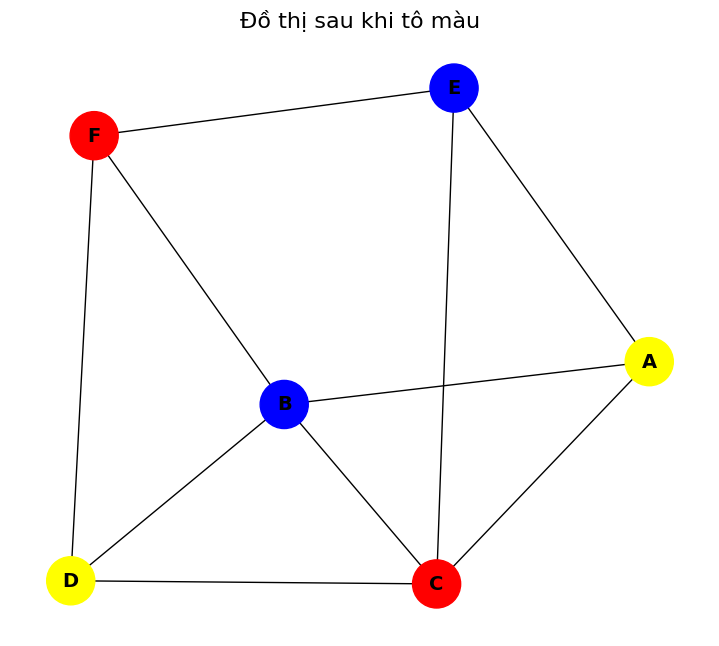

In [ ]:
# ============================
# Cài thư viện (chỉ cần cho Colab)
# ============================
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# ============================
# Ma trận kề của đồ thị 6 đỉnh
# ============================
G_matrix = [
    [0, 1, 1, 0, 1, 0],
    [1, 0, 1, 1, 0, 1],
    [1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 1],
    [0, 1, 0, 1, 1, 0]
]

node = "ABCDEF"
t_ = {node[i]: i for i in range(len(G_matrix))}

# ============================
# Bậc các đỉnh
# ============================
degree = [sum(G_matrix[i]) for i in range(len(G_matrix))]

# ============================
# Tập màu có thể dùng
# ============================
availableColors = ["Blue", "Red", "Yellow", "Green"]
colorDict = {node[i]: availableColors.copy() for i in range(len(G_matrix))}

# ============================
# Sắp xếp đỉnh theo bậc giảm dần
# ============================
degree_pairs = list(zip(node, degree))
sortedNode = [x[0] for x in sorted(degree_pairs, key=lambda x: x[1], reverse=True)]

# ============================
# Greedy Coloring Algorithm
# ============================
theSolution = {}

for n in sortedNode:
    chosenColor = colorDict[n][0]
    theSolution[n] = chosenColor

    idx = t_[n]
    for j in range(len(G_matrix[idx])):
        if G_matrix[idx][j] == 1:
            neighbor = node[j]
            if chosenColor in colorDict[neighbor]:
                colorDict[neighbor].remove(chosenColor)

# ============================
# In kết quả theo dạng bảng
# ============================
print("===== KẾT QUẢ TÔ MÀU =====")
print(f"{'Đỉnh':<10}{'Bậc':<10}{'Màu'}")
print("-" * 30)
for n in sorted(node):
    print(f"{n:<10}{degree[t_[n]]:<10}{theSolution[n]}")
print("-" * 30)

# ============================
# Vẽ đồ thị bằng NetworkX
# ============================
G = nx.Graph()

# thêm đỉnh
for n in node:
    G.add_node(n)

# thêm cạnh dựa theo ma trận kề
for i in range(len(G_matrix)):
    for j in range(i+1, len(G_matrix)):
        if G_matrix[i][j] == 1:
            G.add_edge(node[i], node[j])

# chuẩn bị màu cho NetworkX
color_map = [theSolution[n] for n in G.nodes()]

# Vẽ đồ thị
plt.figure(figsize=(7, 6))
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G, pos,
    with_labels=True,
    node_color=color_map,
    node_size=1200,
    font_size=14,
    font_weight='bold',
    edge_color="black"
)

plt.title("Đồ thị sau khi tô màu", fontsize=16)
plt.show()
